11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
375/375 [==============================] - 74s 188ms/step - loss: 0.2793 - accuracy: 0.9173 - val_loss: 0.0912 - val_accuracy: 0.9719
Epoch 2/10
375/375 [==============================] - 44s 118ms/step - loss: 0.0742 - accuracy: 0.9773 - val_loss: 0.0670 - val_accuracy: 0.9810
Epoch 3/10
375/375 [==============================] - 43s 116ms/step - loss: 0.0525 - accuracy: 0.9841 - val_loss: 0.0555 - val_accuracy: 0.9828
Epoch 4/10
375/375 [==============================] - 42s 113ms/step - loss: 0.0412 - accuracy: 0.9874 - val_loss: 0.0523 - val_accuracy: 0.9847
Epoch 5/10
375/375 [==============================] - 44s 116ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.0529 - val_accuracy: 0.9846
Epoch 6/10
375/375 [==============================] - 41s 109ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.0463 - val_accuracy: 0.9862
Epoch 7/10
375/375 [==============================] - 43s 115ms/s

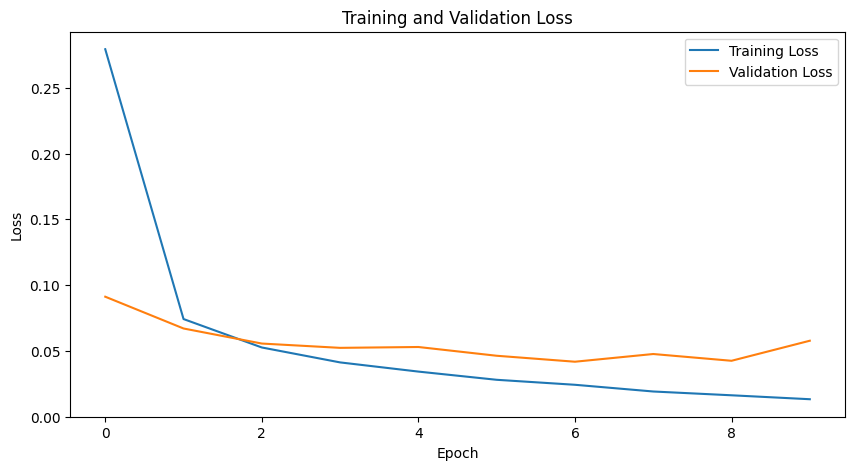

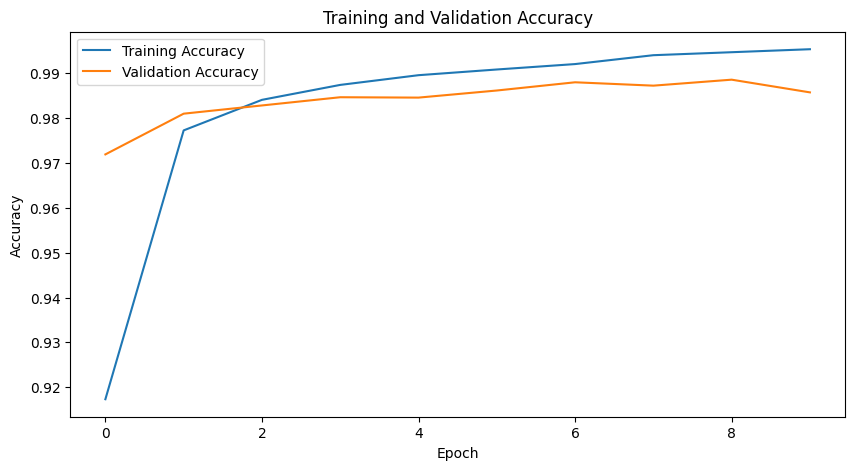

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# Plot the training loss and accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()